[View in Colaboratory](https://colab.research.google.com/github/truongkhanhduy95/Kaggle-Challange/blob/master/Dog%20vs%20Cat/Dog%20or%20Cat.ipynb)

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator

print("TensorFlow version: "+ tf.__version__)

TensorFlow version: 1.9.0


Using TensorFlow backend.


In [0]:
datagen = ImageDataGenerator(
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest')

In [0]:
from keras import backend as K
K.set_image_dim_ordering('th')

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(3, 150, 150)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# the model so far outputs 3D feature maps (height, width, features)

In [0]:
model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [11]:
batch_size = 16

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

# this is a generator that will read pictures found in
# subfolers of 'data/train', and indefinitely generate
# batches of augmented image data
train_generator = train_datagen.flow_from_directory(
        'Kaggle-Challange/Dog vs Cat/data/train',  # this is the target directory
        target_size=(150, 150),  # all images will be resized to 150x150
        batch_size=batch_size,
        class_mode='binary')  # since we use binary_crossentropy loss, we need binary labels

# this is a similar generator, for validation data
validation_generator = test_datagen.flow_from_directory(
        'Kaggle-Challange/Dog vs Cat/data/validation',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 802 images belonging to 2 classes.


In [6]:
! git clone https://github.com/truongkhanhduy95/Kaggle-Challange.git
 

Cloning into 'Kaggle-Challange'...
remote: Counting objects: 2817, done.
remote: Compressing objects: 100% (2817/2817), done.
remote: Total 2817 (delta 0), reused 2813 (delta 0), pack-reused 0
Receiving objects: 100% (2817/2817), 60.38 MiB | 49.11 MiB/s, done.


In [10]:
! cd Kaggle-Challange
! ls

datalab  Kaggle-Challange


In [12]:
model.fit_generator(
        train_generator,
        steps_per_epoch=2000 // batch_size,
        epochs=50,
        validation_data=validation_generator,
        validation_steps=800 // batch_size)
model.save_weights('first_try.h5')  # always save your weights after training or during training

Epoch 1/50
125/125 [==============================] - 22s 177ms/step - loss: 0.7326 - acc: 0.5070 - val_loss: 0.7025 - val_acc: 0.5012
Epoch 2/50
125/125 [==============================] - 20s 162ms/step - loss: 0.6788 - acc: 0.5910 - val_loss: 0.6628 - val_acc: 0.5988
Epoch 3/50
125/125 [==============================] - 20s 164ms/step - loss: 0.6389 - acc: 0.6205 - val_loss: 0.6625 - val_acc: 0.6412
Epoch 4/50
125/125 [==============================] - 20s 161ms/step - loss: 0.6280 - acc: 0.6550 - val_loss: 0.6505 - val_acc: 0.6300
Epoch 5/50
125/125 [==============================] - 20s 162ms/step - loss: 0.6067 - acc: 0.6765 - val_loss: 0.6044 - val_acc: 0.6987
Epoch 6/50
125/125 [==============================] - 20s 163ms/step - loss: 0.6003 - acc: 0.6945 - val_loss: 0.5796 - val_acc: 0.7100
Epoch 7/50
125/125 [==============================] - 20s 161ms/step - loss: 0.5906 - acc: 0.7000 - val_loss: 0.5887 - val_acc: 0.6975
Epoch 8/50
125/125 [==============================] - 2

In [68]:
def upload_files():
  from google.colab import files
  uploaded = files.upload()
  for k, v in uploaded.items():
    open(k, 'wb').write(v)
  return list(uploaded.keys())

upload_files()


Saving DSC00143.JPG to DSC00143 (1).JPG


['DSC00143.JPG']

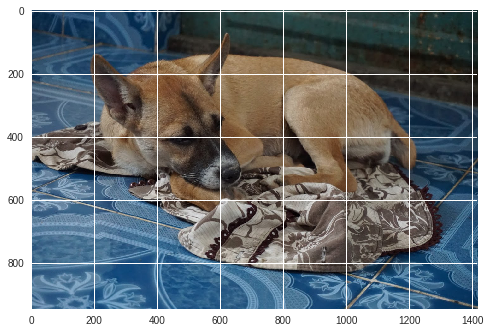

(1, 3, 150, 150)


In [69]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from PIL import Image

img = load_img('DSC00143.JPG')  # this is a PIL image

import matplotlib.pyplot as plt

plt.imshow(img)
plt.show()

img = img.resize((150, 150), Image.ANTIALIAS)
x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)
print(x.shape)



In [70]:
print(model.predict(x))

[[1.]]
